In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
data = pd.read_csv("german_credit_data_with Target.csv",index_col=0)

In [3]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [18]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(data["Sex"].unique())
data["Sex"] = le.transform(data["Sex"])

le.fit(data["Housing"].unique())
data["Housing"] = le.transform(data["Housing"])

le.fit(data["Saving accounts"].unique())
data["Saving accounts"] = le.transform(data["Saving accounts"])

le.fit(data["Checking account"].unique())
data["Checking account"] = le.transform(data["Checking account"])

le.fit(data["Purpose"].unique())
data["Purpose"] = le.transform(data["Purpose"])

le.fit(data["Risk"].unique())
data["Risk"] = le.transform(data["Risk"])
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,4,0,1169,6,5,1
1,22,0,2,1,0,1,5951,48,5,0
2,49,1,1,1,0,3,2096,12,3,1
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,0


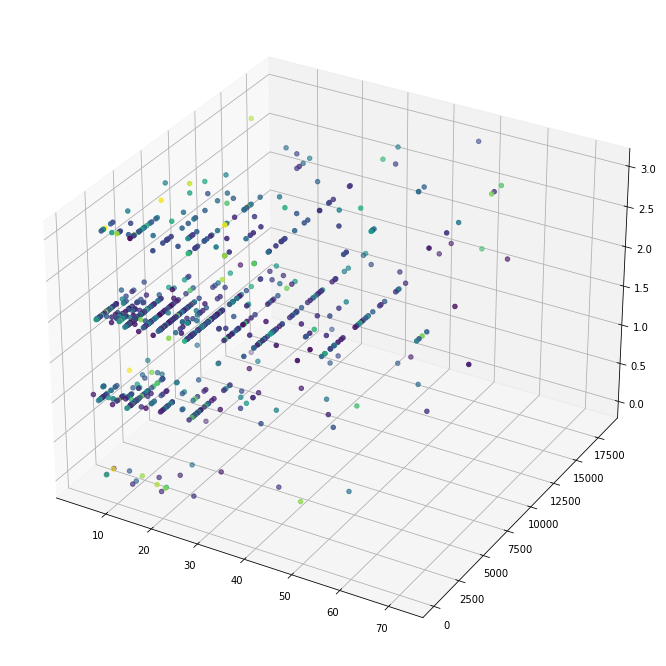

In [65]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize = (12,12))
ax = plt.axes(projection='3d')
ax.scatter3D(data["Duration"],data["Credit amount"], data["Job"], c = data["Age"])

In [40]:
from sklearn.preprocessing import StandardScaler
y_data = data["Risk"]
x_data = data[["Age","Sex","Job","Housing","Saving accounts", "Checking account", "Credit amount", "Duration", "Purpose"]]
#x_data = data[["Age","Job","Housing","Saving accounts", "Checking account", "Credit amount"]]

scaler = StandardScaler()
scaler.fit(x_data)
x_data = scaler.transform(x_data)
x_data.shape


(1000, 6)

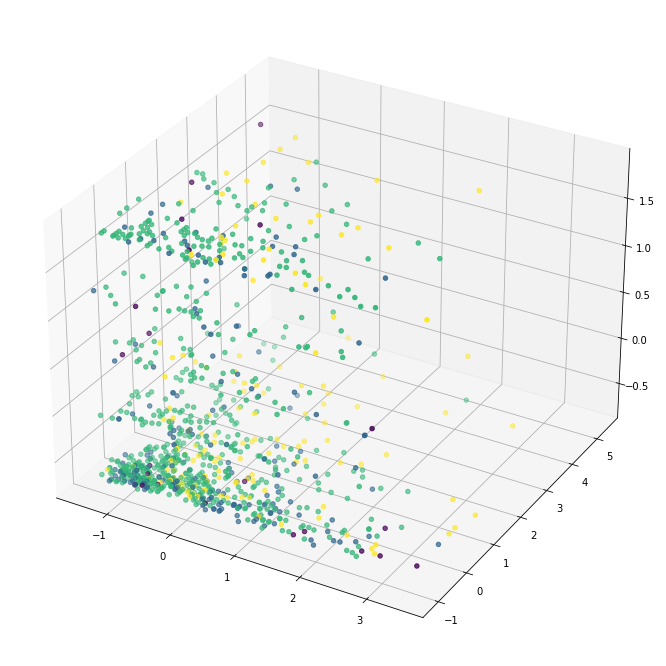

In [50]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize = (12,12))
ax = plt.axes(projection='3d')
ax.scatter3D(x_data[:,0],x_data[:,5], x_data[:,3], c = x_data[:,1])

<AxesSubplot:>

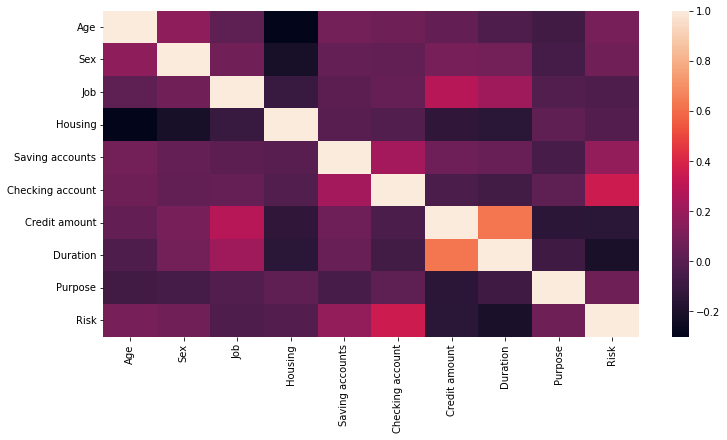

In [56]:
import seaborn as sns
plt.figure(figsize = (12,6))
corr = data.corr()
sns.heatmap(corr)

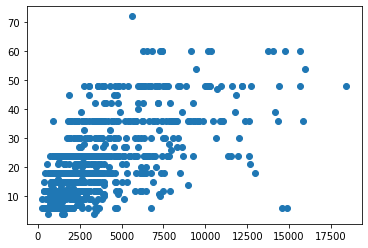

In [57]:
plt.scatter(data["Credit amount"],data["Duration"])

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0).fit(x_data)
kmeans.labels_
kmeans.cluster_centers_


array([[ 1.54680812, -0.22770272, -0.76584892, -0.4163083 , -0.24762416,
        -0.31633673],
       [-0.3768232 ,  0.10173802,  0.12056747, -0.4859622 ,  1.02799468,
        -0.27959921],
       [-0.52755899, -0.2137939 ,  0.33410221, -0.54039395, -0.88719872,
        -0.27824822],
       [ 0.10805045,  0.9123095 , -0.50297435,  0.08871274, -0.18604703,
         2.26334917],
       [ 0.11149957, -0.08566033,  0.13400587,  1.64382416,  0.43790545,
        -0.15681623]])

In [14]:
inertia = []
for i in range (2,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x_data)
    inertia.append(kmeans.inertia_)

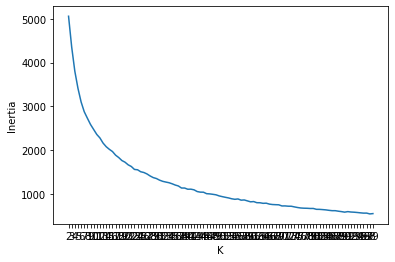

In [15]:
k = np.arange(2,20,1)
plt.plot(k,inertia)
plt.xticks(k)
plt.ylabel("Inertia")
plt.xlabel("K");
